In [1]:
%%capture
pip install geopandas

Import needed libraries and datasets

In [2]:
import pandas as pd
import geopandas as gpd
denver = pd.read_csv('./data/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [3]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods = neighborhoods.sort_values('NBHD_ID')
neighborhoods

census = pd.read_csv('./data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


# Location of all Starbucks cafes in the city of Denver.

Based on the map, majority of the neighborhoods have at least one Starbucks Cafe.

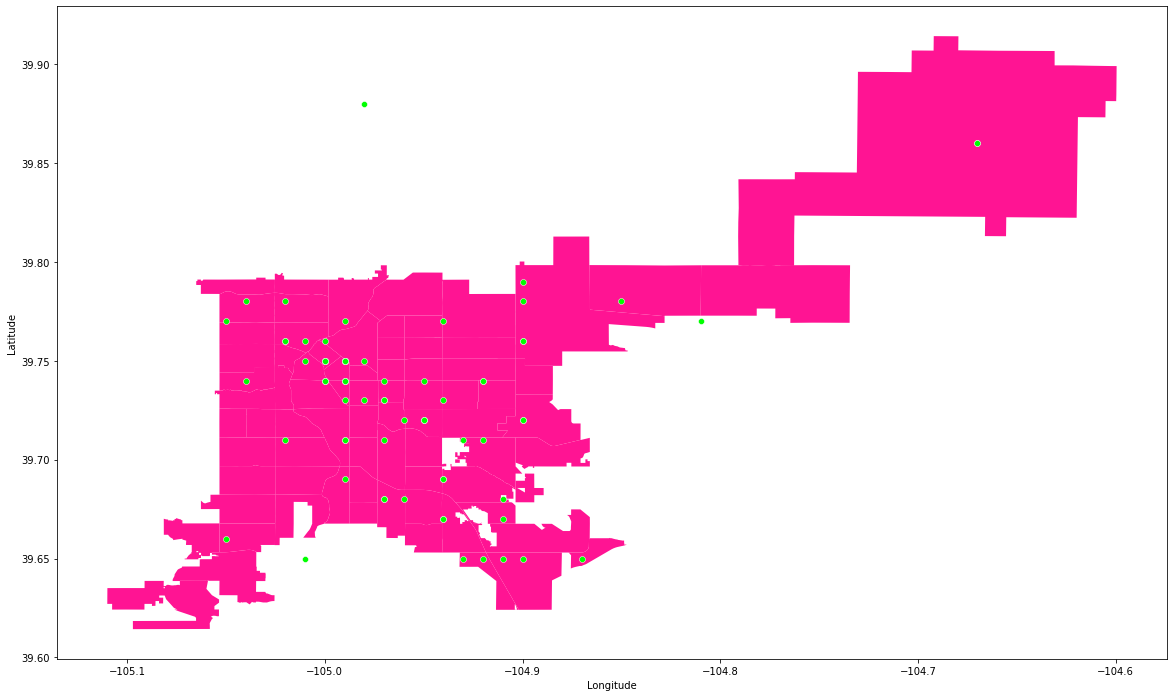

In [4]:
# Merge the 'neighborhoods' and 'census' datasets for easier plotting of maps
neighborhoods_census = neighborhoods.merge(census)
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(24,12))

# Indicates the location of all Strabucks coffee shops in the city of Denver

neighborhoods_census['geometry'].plot(ax = ax, color = 'deeppink')
starbs_map = sns.scatterplot(x="Longitude", y="Latitude", data = denver, ax = ax, color = 'lime')

# Concentration of populations with ages 18 to 34 years old.

The map below indicates the concentration of populations with ages 18 to 34 years old. The darker the hue of the marker is, the higher the population of the age bracket is.

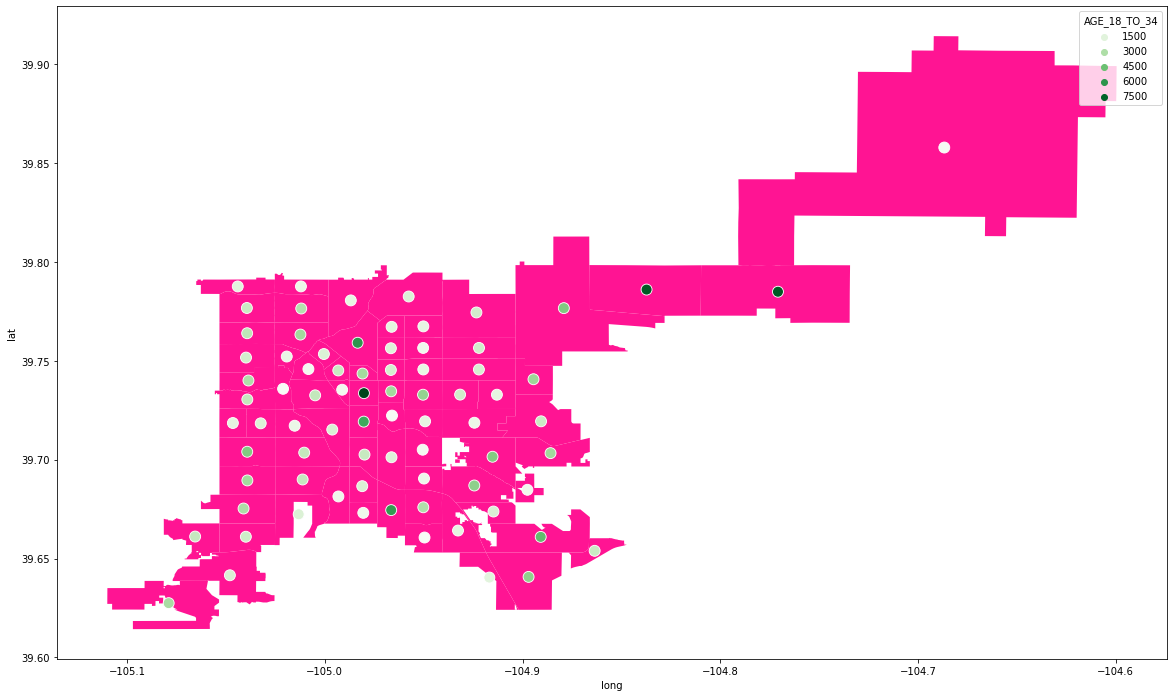

In [5]:
# The dataset has provided the polygons for the different neighborhoods, however it does not indicate a point location that can be inputed in the map. The following lines of code uses the given coordinates to create center points for each neighborhood.

neighborhoods_census['Center_point'] = neighborhoods_census['geometry'].centroid
neighborhoods_census["long"] = neighborhoods_census.Center_point.map(lambda p: p.x)
neighborhoods_census["lat"] = neighborhoods_census.Center_point.map(lambda p: p.y)

fig, ax = plt.subplots(figsize=(24,12))

neighborhoods_census['geometry'].plot(ax = ax, color = 'deeppink')
starbs_map = sns.scatterplot(x="long", y="lat", data = neighborhoods_census , ax = ax, hue = 'AGE_18_TO_34', s = 120, palette = 'Greens')

# Concentration of populations with household incomes above USD 100,000

The map below indicates the concentration of populations with households that are above USD 100,000. The darker the hue of the marker is, the higher the population of high income households is.

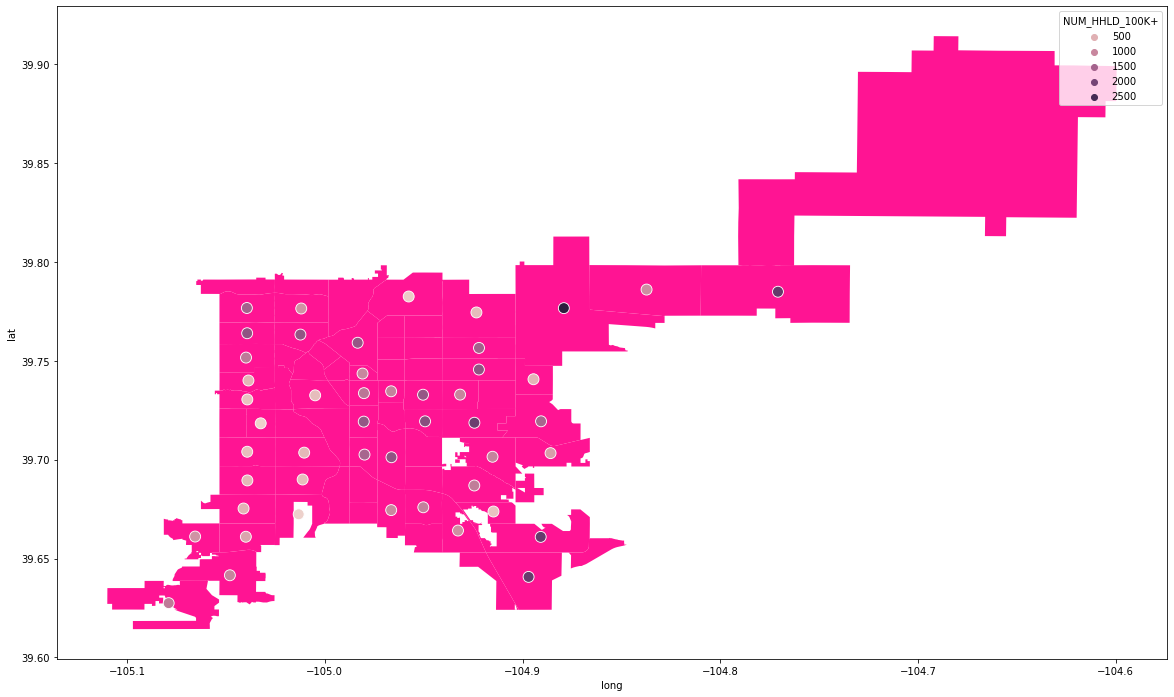

In [6]:
fig, ax = plt.subplots(figsize=(24,12))

neighborhoods_census['geometry'].plot(ax = ax, color = 'deeppink')
starbs_map = sns.scatterplot(x="long", y="lat", data = neighborhoods_census , ax = ax, hue = 'NUM_HHLD_100K+', s = 120)

# Prefernce scatterplot of all neighborhoods in Denver.

The scatterplot below indicates what are the most preferred neighborhoods to set up the cafe. Along the x-values the 18 to 34 aged population increases, and along y-values the households with an income above USD 100,000 increases.

Central Park, Hampden South, Hampden, Speer, Five Points, University, Montbello, Capitol Hill, and Gateway - Green Valley Ranch are few of the most preferrable neighborhoods.

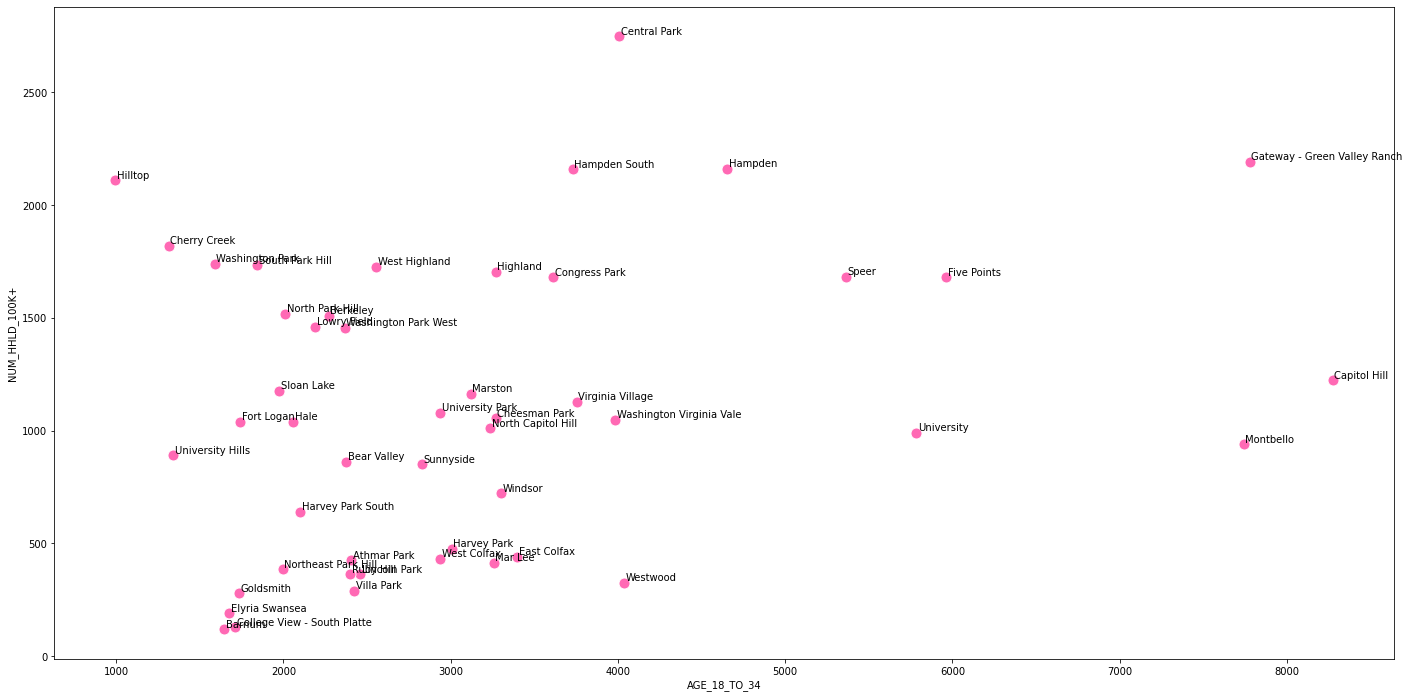

In [7]:
# In order to create a scatterplot, the dataset was cleaned first by removing all rows which were missing values.

preferred = neighborhoods_census[['NBHD_NAME','AGE_18_TO_34', 'NUM_HHLD_100K+']].dropna()

fig, ax_1 = plt.subplots(figsize=(24,12))
ax_1 = preferred_map = sns.scatterplot(x="AGE_18_TO_34", y="NUM_HHLD_100K+", data = preferred , s = 120, color = 'hotpink')


address = preferred['NBHD_NAME']
age = preferred['AGE_18_TO_34']
income = preferred['NUM_HHLD_100K+']

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+10, point['y'] + 10, str(point['val']))
        
label_point(age, income, address, ax_1)